In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5837,Ako ay may lobo Pinoy Kid Song Offline,FAMILY,NaN,0,9.7M,1+,Free,0,Mature 17+,Entertainment,"July 30, 2018",3.0,2.3 and up
9184,Free E B Garamond Cool Font,PERSONALIZATION,4.2,410,6.1M,"100,000+",Free,0,Everyone,Personalization,"April 20, 2018",33.0,4.0.3 and up
2741,Modcloth – Unique Indie Women's Fashion & Style,SHOPPING,4.2,5121,8.8M,"500,000+",Free,0,Everyone,Shopping,"July 13, 2018",9.0.30,4.1 and up
10031,Subway Simulator 3D,FAMILY,4.0,25489,62M,"1,000,000+",Free,0,Everyone,Simulation,"August 6, 2018",2.9.0,4.1 and up
6996,Art Pixel Coloring. Color by Number.,FAMILY,4.5,992,49M,"100,000+",Free,0,Teen,Entertainment,"August 2, 2018",1.2.0.200,4.2 and up
606,Live Girls Talk - Free Video Chat,DATING,4.8,125,4.7M,"5,000+",Free,0,Mature 17+,Dating,"July 8, 2018",8.2,4.0.3 and up
1387,Endomondo - Running & Walking,HEALTH_AND_FITNESS,4.5,559262,Varies with device,"10,000,000+",Free,0,Everyone,Health & Fitness,"July 11, 2018",Varies with device,Varies with device
9017,DW Missed call cleaner patch,TOOLS,3.9,65,54k,"5,000+",Free,0,Everyone,Tools,"November 27, 2014",1.4,2.0 and up
8574,Basketball Dynasty Manager 16,SPORTS,4.4,426,21M,"5,000+",Paid,$1.99,Everyone,Sports,"June 1, 2016",2.2.3,4.0 and up
7765,Card Creator for CR,TOOLS,4.4,117850,17M,"10,000,000+",Free,0,Everyone,Tools,"May 19, 2018",1.8.0,4.1 and up


# Preprocessing

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

## category column

In [8]:
df['category'].describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: category, dtype: object

In [9]:
df['category'].value_counts()

category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [10]:
df = df[df['category'] != '1.9']

Text(0.5, 1.0, 'Categories with their counts')

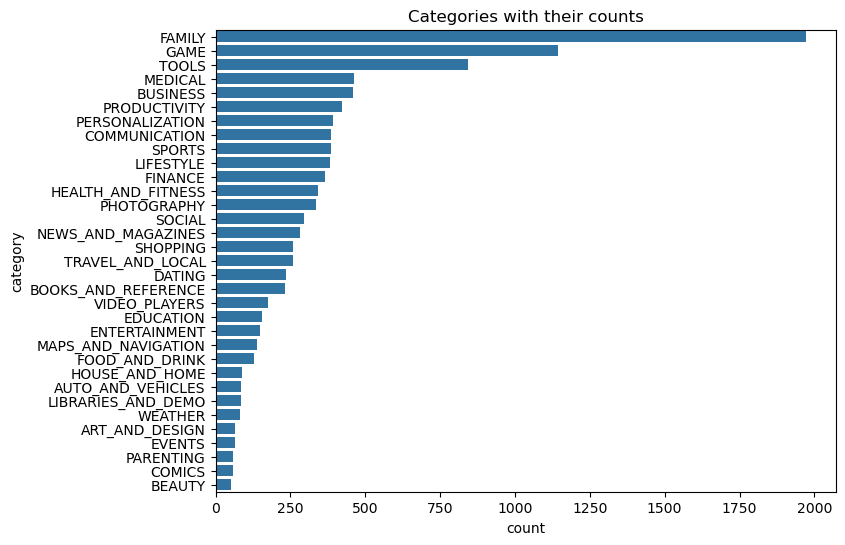

In [57]:
order = df['category'].value_counts().index

sns.countplot(y = "category", data = df, order=order)
plt.title("Categories with their counts")

## rating column

In [12]:
rating_median = df['rating'].median()
df['rating'] = df['rating'].fillna(rating_median)

In [13]:
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    0
genres            0
last_updated      0
current_ver       8
android_ver       2
dtype: int64

In [14]:
df['rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

In [15]:
print(df['rating'].dtype)

float64


In [16]:
df["rating"].skew()

-2.0625185561411414

Text(0.5, 1.0, 'Distribution of rating')

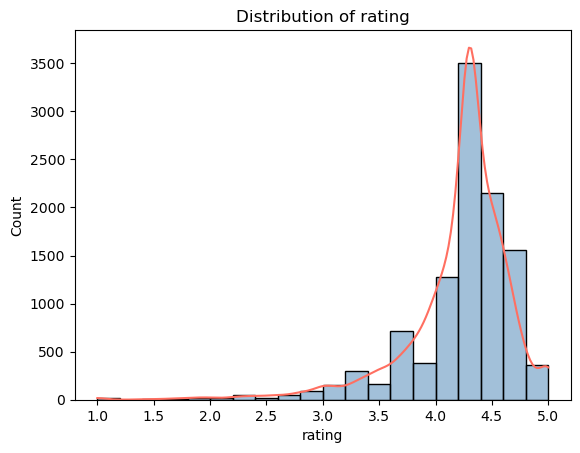

In [17]:
ax = sns.histplot(data=df['rating'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of rating")

In [18]:
# Log transform makes negative skew worse, Yeo-Johnson is a better choice here
from sklearn.preprocessing import PowerTransformer

pt_rating = PowerTransformer(method="yeo-johnson")
df["rating_transformed"] = pt_rating.fit_transform(df[["rating"]])

Text(0.5, 1.0, 'Distribution of ratings (rating_transformed)')

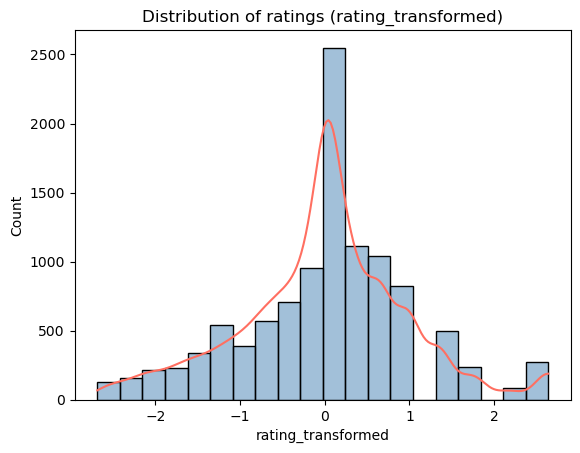

In [19]:
ax = sns.histplot(data=df['rating_transformed'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of ratings (rating_transformed)")

In [20]:
df["rating_transformed"].skew()

-0.005331828101793434

In [21]:
df = df.drop(columns=["rating"])

## reviews column

In [22]:
df["reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: reviews, Length: 10840, dtype: object

In [61]:
df["reviews"].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: reviews, dtype: float64

In [23]:
df["reviews"] = df["reviews"].astype('int64')

In [24]:
df["reviews"].dtype

dtype('int64')

In [58]:
df["reviews"].skew()

16.449584335038757

Text(0.5, 1.0, 'Distribution of reviews')

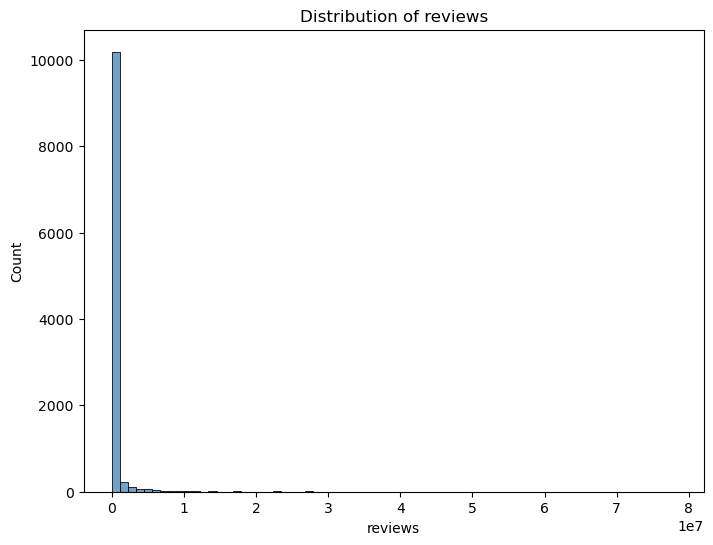

In [70]:
ax = sns.histplot(data=df['reviews'], bins=70, kde=False, color='#4682B4')
# ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews")

In [72]:
df["reviews_log"] = np.log1p(df["reviews"])

In [73]:
df["reviews_log"].skew()

-0.01567309109651736

Text(0.5, 1.0, 'Distribution of reviews')

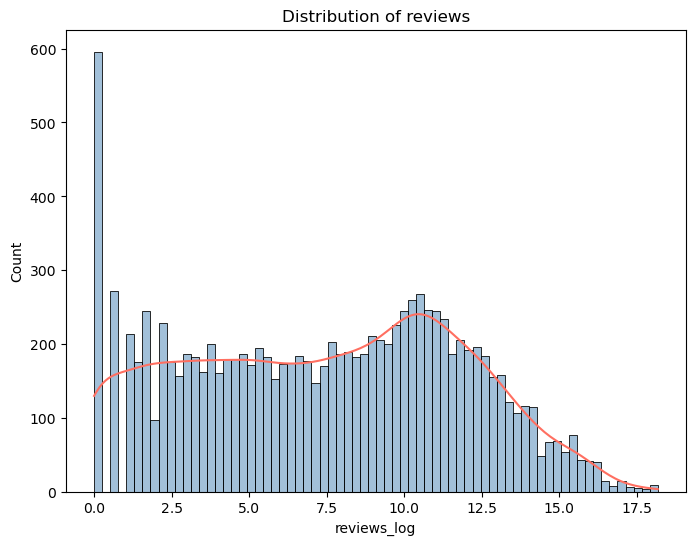

In [76]:
ax = sns.histplot(data=df['reviews_log'], bins=70, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of reviews")

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['reviews_log_scaled'] = scaler.fit_transform(df[['reviews_log']])

In [79]:
df['reviews_log_scaled'].describe()

count    1.084000e+04
mean     1.678035e-16
std      1.000046e+00
min     -1.687807e+00
25%     -8.516567e-01
50%      5.757052e-02
75%      8.024602e-01
max      2.460178e+00
Name: reviews_log_scaled, dtype: float64

In [80]:
df = df.drop(columns=['reviews', 'reviews_log'])

## size column

In [25]:
df['size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: size, Length: 10840, dtype: object

In [26]:
df['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [27]:
df['size'].value_counts()

size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

#### remove K and M, convert to megabytes, replace 'Varies with device' with median

In [28]:
# Operates on string values in a pandas Series (like the size column) and is designed for string manipulation using regular expressions or simple string replacements.
df["size"] = df["size"].str.replace(r'(\d+\.?\d*)[kK]', lambda x: str(float(x.group(1)) / 1000), regex=True)

# df["column"].replace is typically used to replace entire values in a Series (e.g., replacing "10K" with 0.01). 
# However, when regex=True is used with df["column"].replace, it behaves more like a substring replacement.
df["size"] = df["size"].replace("M","", regex=True)

In [29]:
# Using df["size"] = df["size"].astype('float64') -> could not convert string to float: 'Varies with device'

# convert 'Varies with device' to nan
df["size"] = pd.to_numeric(df["size"], errors='coerce').astype('float64')

In [30]:
size_median = df['size'].median()
df['size'] = df['size'].fillna(size_median)

In [31]:
df['size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 1.30e+01,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00, 7.20e+00,
       2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e+01, 2.30e

## installs column

In [32]:
df['installs'].value_counts()

installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [33]:
df['installs'] = df['installs'].replace('0', '0+')

In [34]:
# Use str.replace to remove '+' and ',' inside strings
df['installs'] = df['installs'].str.replace('+', '').str.replace(',', '')

In [35]:
df['installs'].value_counts()

installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [36]:
df['installs'] = df['installs'].astype('int64')

## type column

In [37]:
df['type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: type, dtype: object

In [38]:
df['type'].value_counts()

type
Free    10039
Paid      800
Name: count, dtype: int64

## price column

In [39]:
df['price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: price, dtype: object

In [40]:
df['price'].value_counts()

price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [41]:
# Remove $ and convert to float
df['price'] = df['price'].str.replace('$', '', regex=False).astype('float64')

In [42]:
df['price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of prices')

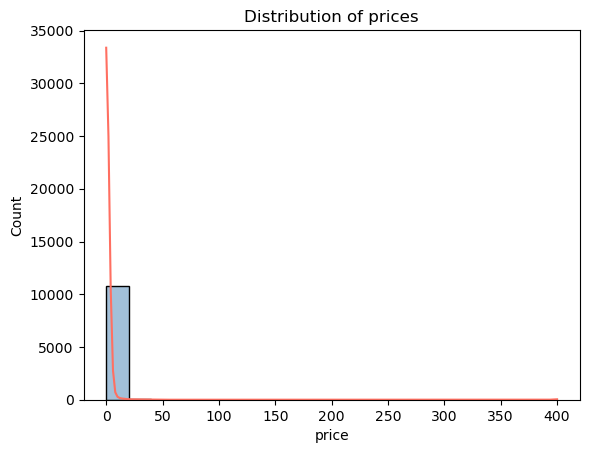

In [43]:
ax = sns.histplot(data=df['price'], bins=20, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices")

In [44]:
df['price_log'] = np.log1p(df['price'])

Text(0.5, 1.0, 'Distribution of prices (Log Transformed)')

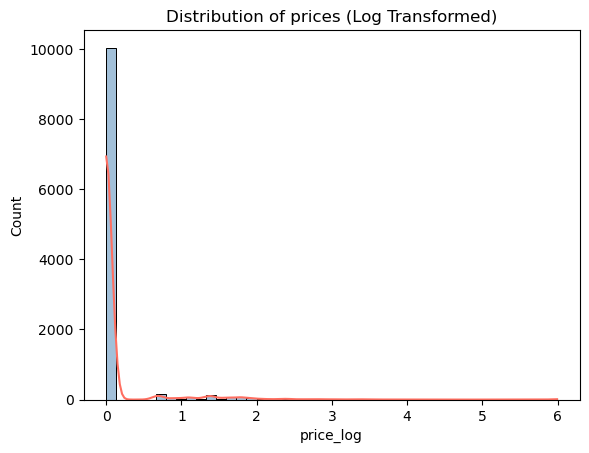

In [45]:
ax = sns.histplot(data=df['price_log'], bins=45, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices (Log Transformed)")

In [46]:
from scipy.stats import boxcox
df['price_boxcox'], _ = boxcox(df['price'] + 1)

Text(0.5, 1.0, 'Distribution of prices (boxcox Transformed)')

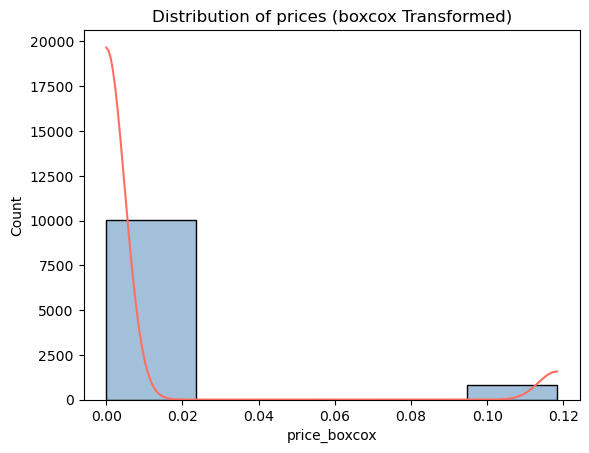

In [47]:
ax = sns.histplot(data=df['price_boxcox'], bins=5, kde=True, color='#4682B4')
ax.lines[0].set_color('#FF6F61')
plt.title("Distribution of prices (boxcox Transformed)")

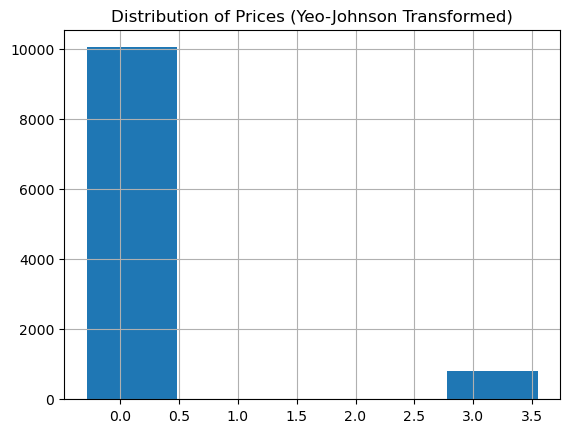

In [48]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['price_yeo'] = pt.fit_transform(df[['price']])

df['price_yeo'].hist(bins=5)
plt.title('Distribution of Prices (Yeo-Johnson Transformed)')
plt.show()

In [49]:
# handling above column must continue
# rating column handling must continue

## last_update column

In [50]:
df['last_updated'].describe()

count              10840
unique              1377
top       August 3, 2018
freq                 326
Name: last_updated, dtype: object

In [51]:
# Count how many values of each data type exist in the 'last_updated' column
df["last_updated"].apply(type).value_counts()

last_updated
<class 'str'>    10840
Name: count, dtype: int64

In [52]:
# Use dtype to check column type, describe() to get data statistics
print(df["last_updated"].dtype)

object


In [53]:
df["last_updated"] = pd.to_datetime(df["last_updated"])

In [54]:
print(df["last_updated"].dtype)

datetime64[ns]
